# Finding a Most Likely Common Ancestor

In [“Counting Point Mutations”](../../Level%204/Counting%20Point%20Mutations/Counting%20Point%20Mutations.html), we calculated the minimum number of symbol mismatches between two strings of equal length to model the problem of finding the minimum number of point mutations occurring on the evolutionary path between two homologous strands of DNA. If we instead have several homologous strands that we wish to analyze simultaneously, then the natural problem is to find an average-case strand to represent the most likely common ancestor of the given strands.

## Problem

A matrix is a rectangular table of values divided into rows and columns. An $m\ ×\ n$ matrix has $m$ rows and $n$ columns. Given a matrix $A$, we write $A_{i,j}$ to indicate the value found at the intersection of row $i$ and column $j$.

Say that we have a collection of DNA strings, all having the same length $n$. Their profile matrix is a $4\ ×\ n$ matrix $P$ in which $P_{1,j}$ represents the number of times that 'A' occurs in the $j$th position of one of the strings, $P_{2,j}$ represents the number of times that C occurs in the $j$th position, and so on (see below).

A consensus string $c$ is a string of length $n$ formed from our collection by taking the most common symbol at each position; the $j$th symbol of $c$ therefore corresponds to the symbol having the maximum value in the $j$-th column of the profile matrix. Of course, there may be more than one most common symbol, leading to multiple possible consensus strings.

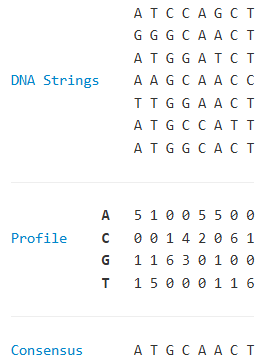



<span style="color:rgba(70,165,70,255); font-weight:bold">Given</span>: A collection of at most 10 DNA strings of equal length (at most 1 kbp) in FASTA format.


<span style="color:rgba(70,165,70,255); font-weight:bold">Return</span>:  A consensus string and profile matrix for the collection. (If several possible consensus strings exist, then you may return any one of them.)



## Read Files

In [51]:
%run ../../functions/read_files.ipynb

In [53]:
df_input = read_fasta("./sample_input.txt")
output = read_text("./sample_output.txt")

## Solution

In [56]:
def get_consensus_and_profile_matrix(input_path = './sample_input.txt', output_path = 'nucleotide_frequencies.txt' ):
    
    dna_strings = read_fasta(input_path)
        
    dna_strings_to_df = pd.DataFrame(dna_strings.Sequence.apply(list).tolist())

    freq_df = pd.DataFrame(
            ((dna_strings_to_df == 'A').sum().values,
            (dna_strings_to_df == 'C').sum().values,
            (dna_strings_to_df == 'G').sum().values,
            (dna_strings_to_df == 'T').sum().values), index=['A', 'C', 'G', 'T'])




    # Write to a text file
    with open(output_path, 'w') as file:
        file.write(''.join(freq_df.idxmax().values) + '\n')

        
        for nucleotide, row in freq_df.iterrows():
            formatted_row = f"{nucleotide}: " + " ".join(map(str, row))
            file.write(formatted_row + '\n')

    print("Output written to nucleotide_frequencies.txt")

In [59]:
get_consensus_and_profile_matrix()

Output written to nucleotide_frequencies.txt


## Submit problem

In [62]:
get_consensus_and_profile_matrix(input_path = './rosalind_cons.txt', output_path = 'nucleotide_frequencies_submission.txt')

Output written to nucleotide_frequencies.txt
